<a id = "1" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #304f7d;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;text-align: center;"><b>1. IMPORTING LIBRARIES</b></p>
</div>


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn import metrics
%matplotlib inline

<a id = "2" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #304f7d;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;text-align: center;"><b>2. DATA EXPLORATION AND PREPROCESSING</b></p>
</div>

### 2.1 Loading the dataset

In [2]:
df = pd.read_csv('./house_price_dataset.csv')

In [3]:
df.head(5)

No  transaction date  house age  distance to the nearest bus station  \
0   1          2012.917       32.0                             84.87882   
1   2          2012.917       19.5                            306.59470   
2   3          2013.583       13.3                            561.98450   
3   4          2013.500       13.3                            561.98450   
4   5          2012.833        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest bus station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.describe()

No  transaction date   house age  \
count  414.000000        414.000000  414.000000   
mean   207.500000       2013.148971   17.712560   
std    119.655756          0.281967   11.392485   
min      1.000000       2012.667000    0.000000   
25%    104.250000       2012.917000    9.025000   
50%    207.500000       2013.167000   16.100000   
75%    310.750000       2013.417000   28.150000   
max    414.000000       2013.583000   43.800000   

       distance to the nearest bus station  number of convenience stores  \
count                           414.000000                    414.000000   
mean                           1083.885689                      4.094203   
std                            1262.109595                      2.945562   
min                              23.382840                      0.000000   
25%                             289.324800                      1.000000   
50%                             492.231300                      4.000000   
75%                            1454.279000                      6.000000   
max                            6488.021000                     10.000000   

         latitude   longitude  house price of unit area  
count  414.000000  414.000000                414.000000  
mean    24.969030  121.533361                 37.980193  
std      0.012410    0.015347                 13.606488  
min     24.932070  121.473530                  7.600000  
25%     24.963000  121.528085                 27.700000  
50%     24.971100  121.538630                 38.450000  
75%     24.977455  121.543305                 46.600000  
max     25.014590  121.566270                117.500000

### 2.2 Checking for missing values

In [6]:
df.isnull().sum(axis=0)

No                                     0
transaction date                       0
house age                              0
distance to the nearest bus station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

### 2.3 Preprocessing

In [7]:
def convert_transaction_date(transaction_date):
    
    # Extract year and decimal month from the input
    parts = str(transaction_date).split('.')
    extracter = .001 if len(parts) == 1 else 0.000
    transaction_date = float(transaction_date) +  extracter
    parts = str(transaction_date).split('.')
    decimal_month = math.ceil(float(  '.' + parts[1]) * 12)
    
    # Calculate the month and map it to a corresponding string
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    decimal_month =  decimal_month if decimal_month == 0 else decimal_month - 1
    month_str = months[decimal_month]
    return month_str

In [8]:
df['year'] = df['transaction date'].apply(lambda year: int(year))
df['month'] = df['transaction date'].apply(lambda year: convert_transaction_date(year))

In [9]:
df.tail()

No  transaction date  house age  distance to the nearest bus station  \
409  410          2013.000       13.7                           4082.01500   
410  411          2012.667        5.6                             90.45606   
411  412          2013.250       18.8                            390.96960   
412  413          2013.000        8.1                            104.81010   
413  414          2013.500        6.5                             90.45606   

     number of convenience stores  latitude  longitude  \
409                             0  24.94155  121.50381   
410                             9  24.97433  121.54310   
411                             7  24.97923  121.53986   
412                             5  24.96674  121.54067   
413                             9  24.97433  121.54310   

     house price of unit area  year      month  
409                      15.4  2013    January  
410                      50.0  2012  September  
411                      40.6  2013      March  
412                      52.5  2013    January  
413                      63.9  2013       June

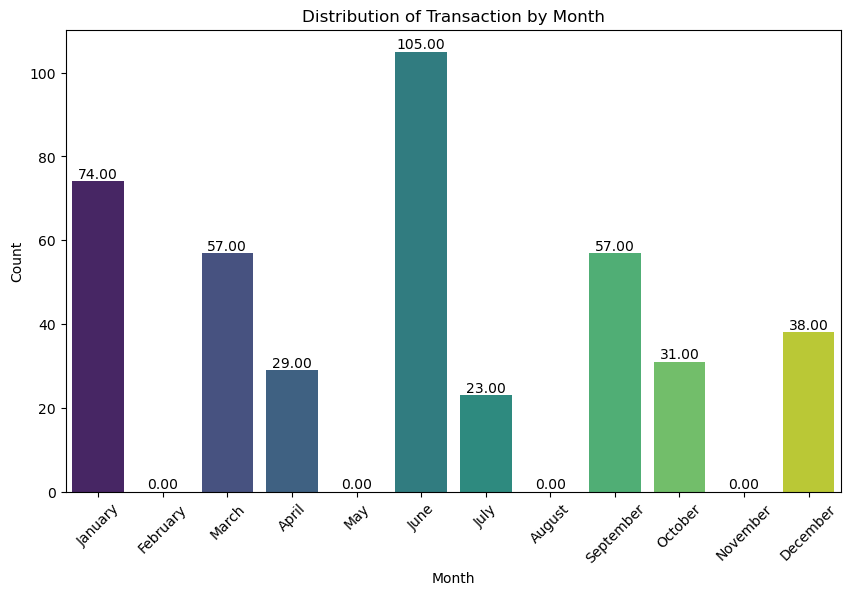

In [10]:
month_order = months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', data=df, palette='viridis',order=month_order)
# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Transaction by Month')
plt.xticks(rotation=45) 
plt.show()

<a id = "3" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #304f7d;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;text-align: center;"><b>3. EXPLORATORY DATA ANALYSIS</b></p>
</div>


### 3.1 Creating PairPlot

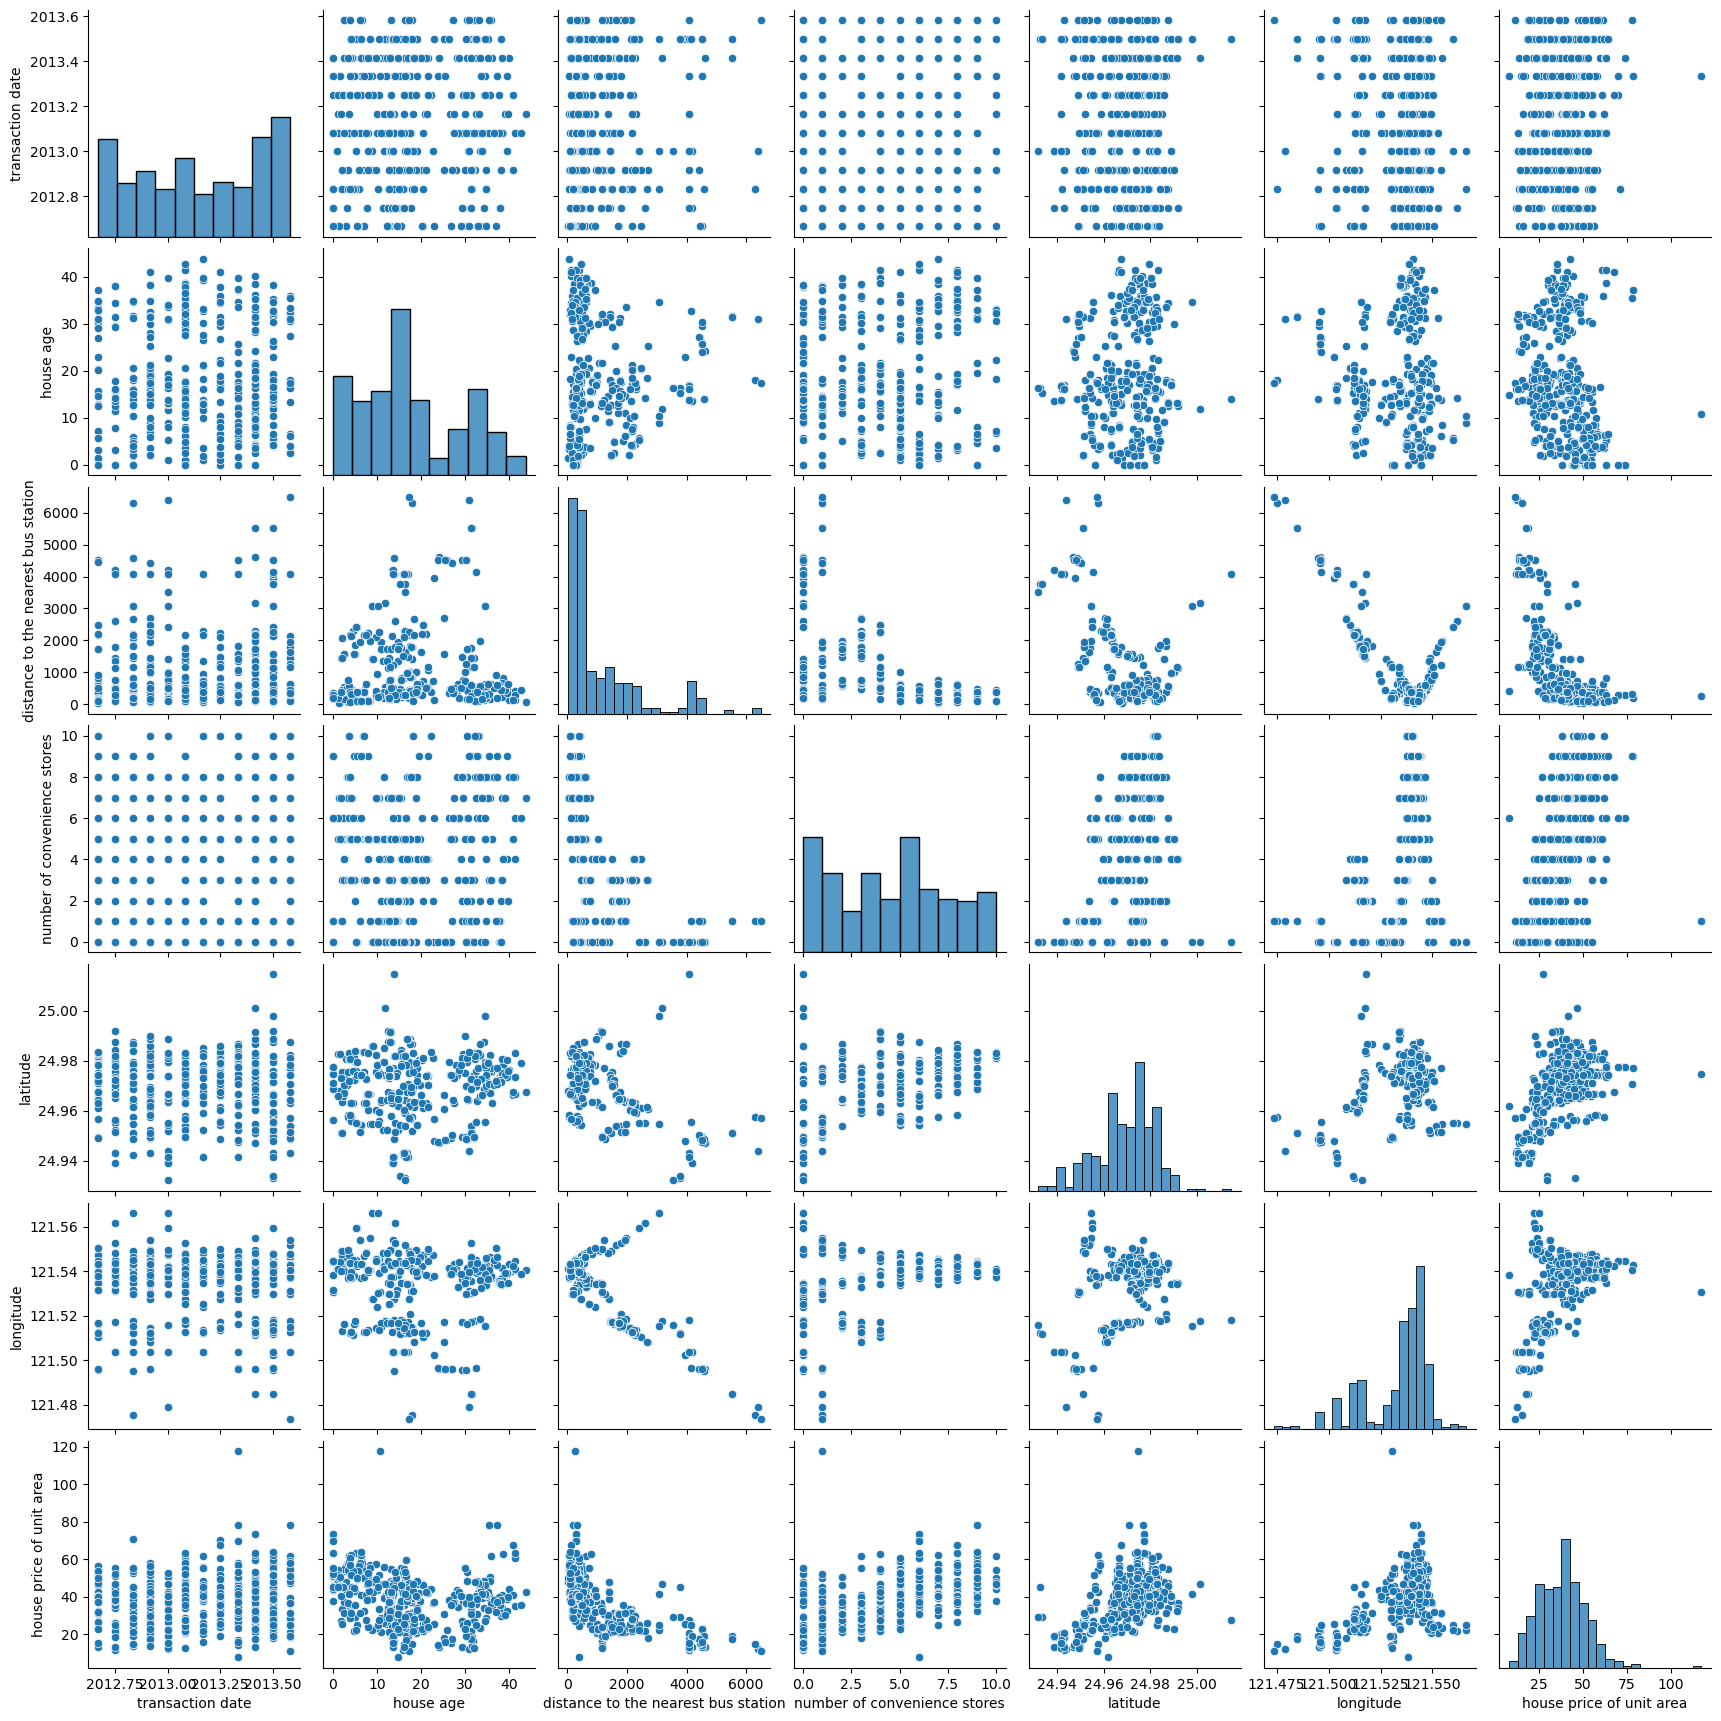

In [11]:
sns.pairplot(df.drop(['No','year'],axis=1))

### 3.2 Relationship between Month vs House Transction Number

[Text(0, 0, '126'), Text(0, 0, '288')]

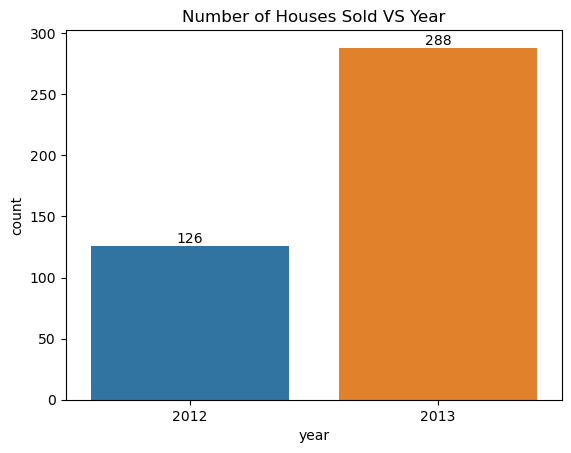

In [12]:
plt.title('Number of Houses Sold VS Year')
plt.xlabel('Year')
plt.ylabel('Total House Sold')
ax = sns.countplot(x='year',data=df)
ax.bar_label(ax.containers[0])

### 3.3 Relationship between different Features vs House Prices

<Axes: xlabel='distance to the nearest bus station', ylabel='house price of unit area'>

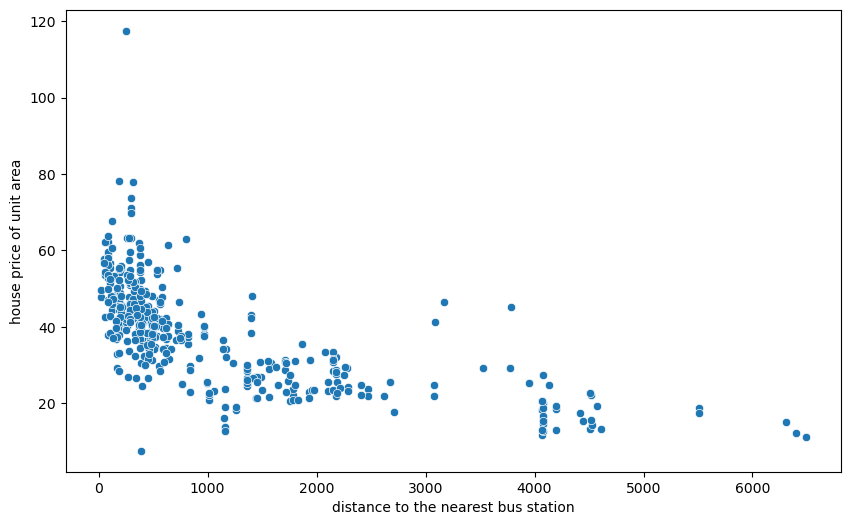

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance to the nearest bus station',y='house price of unit area',data=df)

<Axes: xlabel='house price of unit area', ylabel='latitude'>

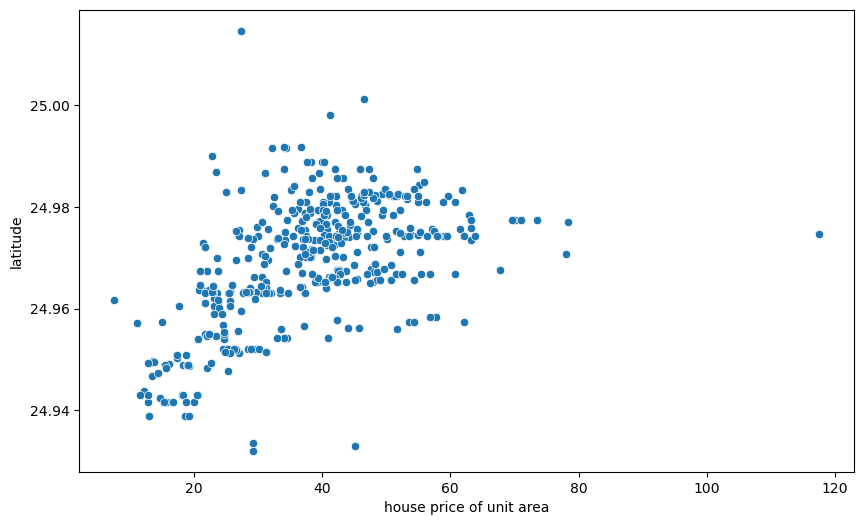

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='house price of unit area',y='latitude',data=df)

<Axes: xlabel='house price of unit area', ylabel='longitude'>

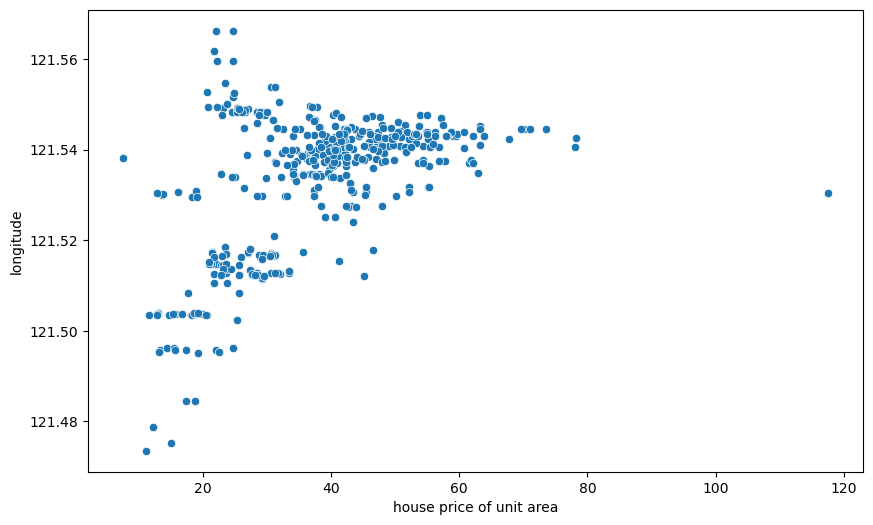

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='house price of unit area',y='longitude',data=df)

In [16]:
# df = df.sort_values(by='house price of unit area',ascending=False)[1:]
# df.head()

<a id = "4" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #304f7d;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;text-align: center;"><b>4. FEATURE ENGINEERING</b></p>
</div>


### 4.1 Correlation between different features

In [17]:
df.corr(numeric_only = True)['house price of unit area'].sort_values(ascending=False)

house price of unit area               1.000000
number of convenience stores           0.571005
latitude                               0.546307
longitude                              0.523287
transaction date                       0.087491
year                                   0.081545
No                                    -0.028587
house age                             -0.210567
distance to the nearest bus station   -0.673613
Name: house price of unit area, dtype: float64

<Axes: >

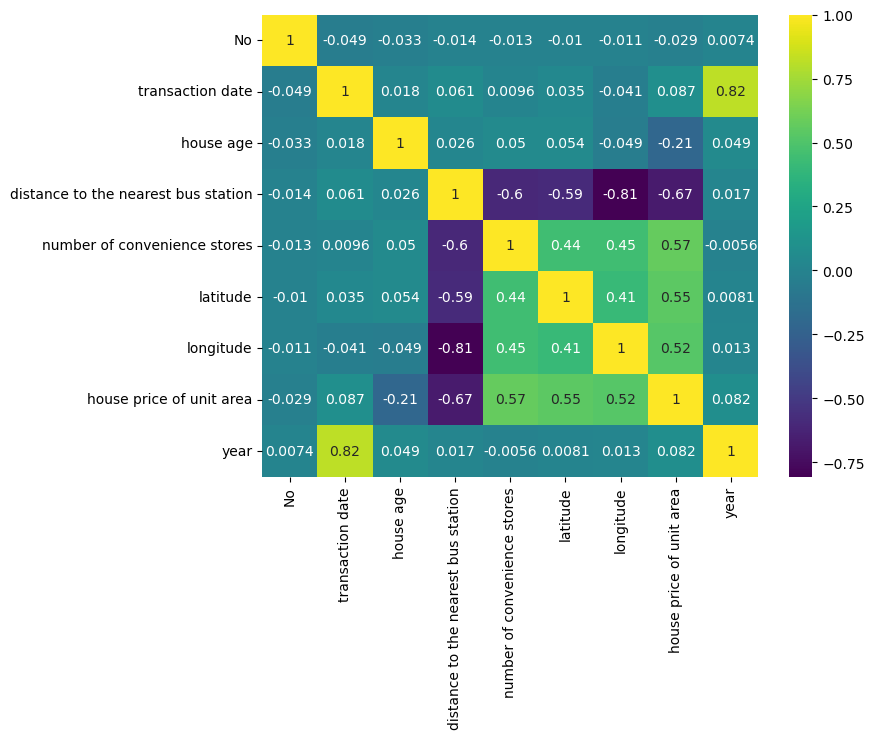

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='viridis')

### 4.2 Creating Box Plot to visualize the outliers

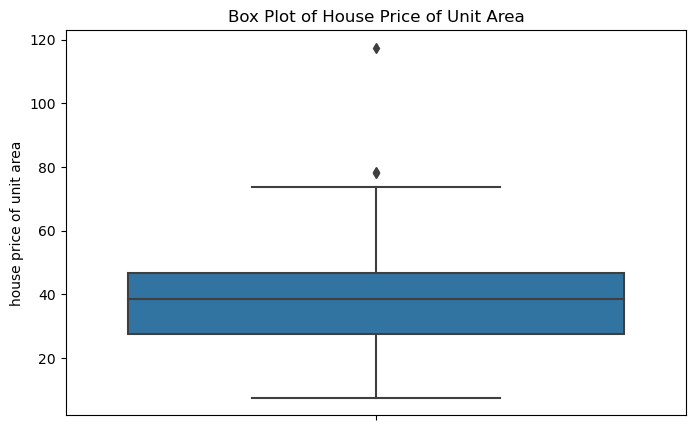

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='house price of unit area',data=df)
plt.title('Box Plot of House Price of Unit Area')
plt.show()

### 4.3 Checking for Outliers

In [20]:
dataframe = pd.read_csv('./house_price_dataset.csv')
outliears=[]

def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outliears.append(i)
    print("House Price Outliers:",outliears)

Zscore_outlier(dataframe['house price of unit area'])

House Price Outliers: [117.5]


### 4.4 Removing Outliers

In [21]:
column = 'house price of unit area'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3*IQR
upper = Q3 + 3*IQR

print("Old Shape: ", df.shape)

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df[column] >= upper)[0]
lower_array = np.where(df[column] <= lower)[0]

print(upper_array)
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

Old Shape:  (414, 10)
[270]
New Shape:  (413, 10)


### 4.5 Removing Columns

In [22]:
df = df.drop('No',axis=1)

### 4.6 Data Splitting

In [23]:
X = df.drop(['house price of unit area','month','transaction date'],axis=1)
y = df['house price of unit area']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((289, 6), (124, 6), (289,), (124,))

###  4.7 Scaling numerical features

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train= scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[0.90410959, 0.07074098, 0.4       , 0.50242365, 0.74050561,
        1.        ],
       [0.40639269, 0.27221897, 0.3       , 0.42704799, 0.46854098,
        1.        ],
       [0.75799087, 0.01521251, 1.        , 0.60239942, 0.76023127,
        1.        ],
       ...,
       [0.71917808, 0.03632116, 0.9       , 0.44352884, 0.79106677,
        0.        ],
       [0.14383562, 0.0103754 , 0.9       , 0.51211827, 0.78868609,
        1.        ],
       [0.42009132, 0.41016652, 0.3       , 0.35579254, 0.3938329 ,
        0.        ]])

In [31]:
X_test

array([[0.3173516 , 0.70389031, 0.        , 0.20116335, 0.24419   ,
        0.        ],
       [0.10502283, 0.03654928, 0.6       , 0.53053805, 0.81203945,
        0.        ],
       [0.37442922, 0.04113795, 0.5       , 0.60542899, 0.79299399,
        1.        ],
       [0.05707763, 0.02055202, 0.4       , 0.42280659, 0.75263576,
        1.        ],
       [0.97488584, 0.06503367, 0.6       , 0.57198255, 0.73925859,
        1.        ],
       [0.40182648, 0.27569713, 0.2       , 0.66226369, 0.53712731,
        1.        ],
       [0.74657534, 0.05708952, 0.6       , 0.38669413, 0.78188414,
        0.        ],
       [0.80821918, 0.04565551, 0.9       , 0.46825012, 0.76136492,
        1.        ],
       [0.37442922, 0.04113795, 0.5       , 0.60542899, 0.79299399,
        1.        ],
       [0.77625571, 0.02076255, 0.7       , 0.41456617, 0.77576239,
        1.        ],
       [0.73744292, 0.01339018, 1.        , 0.60288415, 0.76329214,
        1.        ],
       [0.40182648, 0

<a id = "5" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #304f7d;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;text-align: center;"><b>5. MACHINE LEARNING MODELS TO PREDICT HOUSE VALUE</b></p>
</div>


<a id = "A" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>1. LINEAR REGRESSION</b></p>
</div>


In [32]:
from sklearn.linear_model import LinearRegression

#Creating a linear regression model instance.
model = LinearRegression()

# Fitting the linear regression model to the training data.
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicting values of test dataset
y_pred = model.predict(X_test)

In [34]:
# Mean Absolute Error (MAE) Calculation
MAE_Linear= metrics.mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE) Calculation
MSE_Linear=metrics.mean_squared_error(y_test, y_pred)
# Root Mean Squared Error (RMSE) Calculation
RMSE_Linear= np.sqrt(MSE_Linear)

### Result:

In [35]:
pd.DataFrame([MAE_Linear, MSE_Linear, RMSE_Linear],index=['MAE', 'MSE', 'RMSE'], columns=['Result']).transpose()

MAE        MSE      RMSE
Result  5.928165  63.241061  7.952425

<a id = "B" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>2. POLYNOMIAL FEATURES</b></p>
</div>


In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Fitting the PolynomialFeatures converter to the dataset and transforming the features.
# The degree parameter controls the maximum degree of the polynomials.
# include_bias is set to False to exclude a bias term.

polynomial_features_converter=PolynomialFeatures(degree=1, include_bias=False)
poly_features=polynomial_features_converter.fit(X)
poly_features=polynomial_features_converter.transform(X)



In [37]:
poly_features.shape

(413, 6)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [39]:
polymodel=LinearRegression()

In [40]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred=polymodel.predict(X_test)

In [42]:
# Mean Absolute Error (MAE) Calculation
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
# Mean Squared Error (MSE) Calculation
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
# Root Mean Squared Error (RMSE) Calculation
RMSE_Poly = np.sqrt(MSE_Poly)



### Result:

In [43]:
pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],index=['MAE', 'MSE', 'RMSE'], columns=['Result']).transpose()

MAE        MSE      RMSE
Result  5.928165  63.241061  7.952425

### Finding The Degree For Least Mean Abosulute Error

In [44]:
Poly_MAE_List = []
for degree in range(1,6):
    polynomial_converter=PolynomialFeatures(degree=degree, include_bias=False)
    poly_features=polynomial_converter.fit(X)
    poly_features=polynomial_converter.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    y_pred=polymodel.predict(X_test)
    MAE_Poly_List = metrics.mean_absolute_error(y_test,y_pred)
    Poly_MAE_List.append(MAE_Poly_List)

### Creating Dataframe for Degree vs MAE

In [45]:
data = {
    'Degree': list(range(1, 6)),
    'MAE': Poly_MAE_List
}

dataframe = pd.DataFrame(data)
dataframe.transpose()

0         1         2          3          4
Degree  1.000000  2.000000  3.000000   4.000000   5.000000
MAE     5.928165  4.856829  5.191741  10.028025  31.814004

In [46]:
MAE_Poly = dataframe[dataframe['MAE'] == dataframe['MAE'].min()]

MAE_Poly = MAE_Poly['MAE'].values[0]
MAE_Poly

4.856829214288343

### Ploting Degree vs MAE

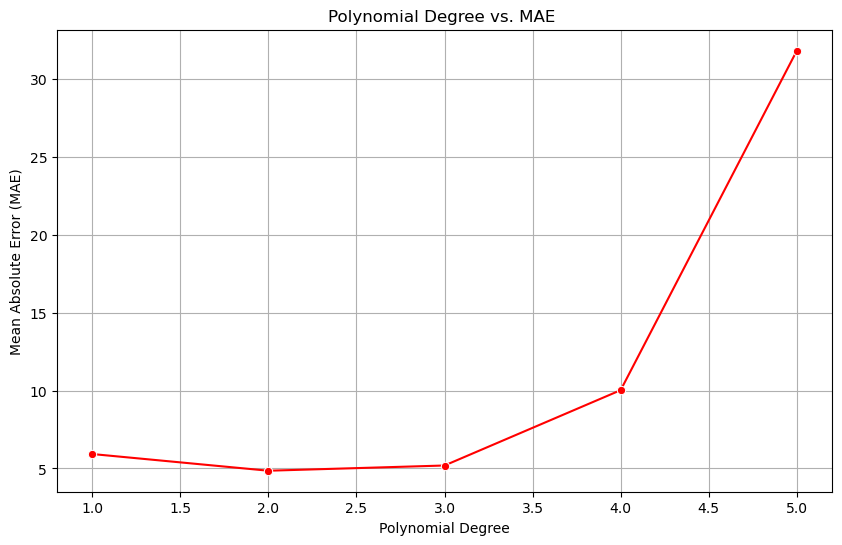

In [47]:
# Create a Seaborn line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Degree', y='MAE', data=dataframe, marker='o', color='red')
plt.title('Polynomial Degree vs. MAE ')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

<a id = "C" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>3. RANDOM FOREST REGRESSOR</b></p>
</div>


In [48]:
from sklearn.ensemble import RandomForestRegressor


# Data Splitting 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Creating and training model
RF_reg = RandomForestRegressor(n_estimators = 10, random_state = 10)
RF_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = RF_reg.predict(X_test)


In [49]:
# Mean Absolute Error (MAE) Calculation
MAE_RandomForest = metrics.mean_absolute_error(y_test,y_pred)
# Mean Squared Error (MSE) Calculation
MSE_RandomForest = metrics.mean_squared_error(y_test,y_pred)
# Root Mean Squared Error (RMSE) Calculation
RMSE_RandomForest = np.sqrt(MSE_RandomForest)

### Result

In [50]:
pd.DataFrame([MAE_RandomForest,MSE_RandomForest,RMSE_RandomForest],index=['MAE', 'MSE', 'RMSE'], columns=['Result']).transpose()

MAE        MSE      RMSE
Result  4.874866  46.538172  6.821889

### Visualizing Tree

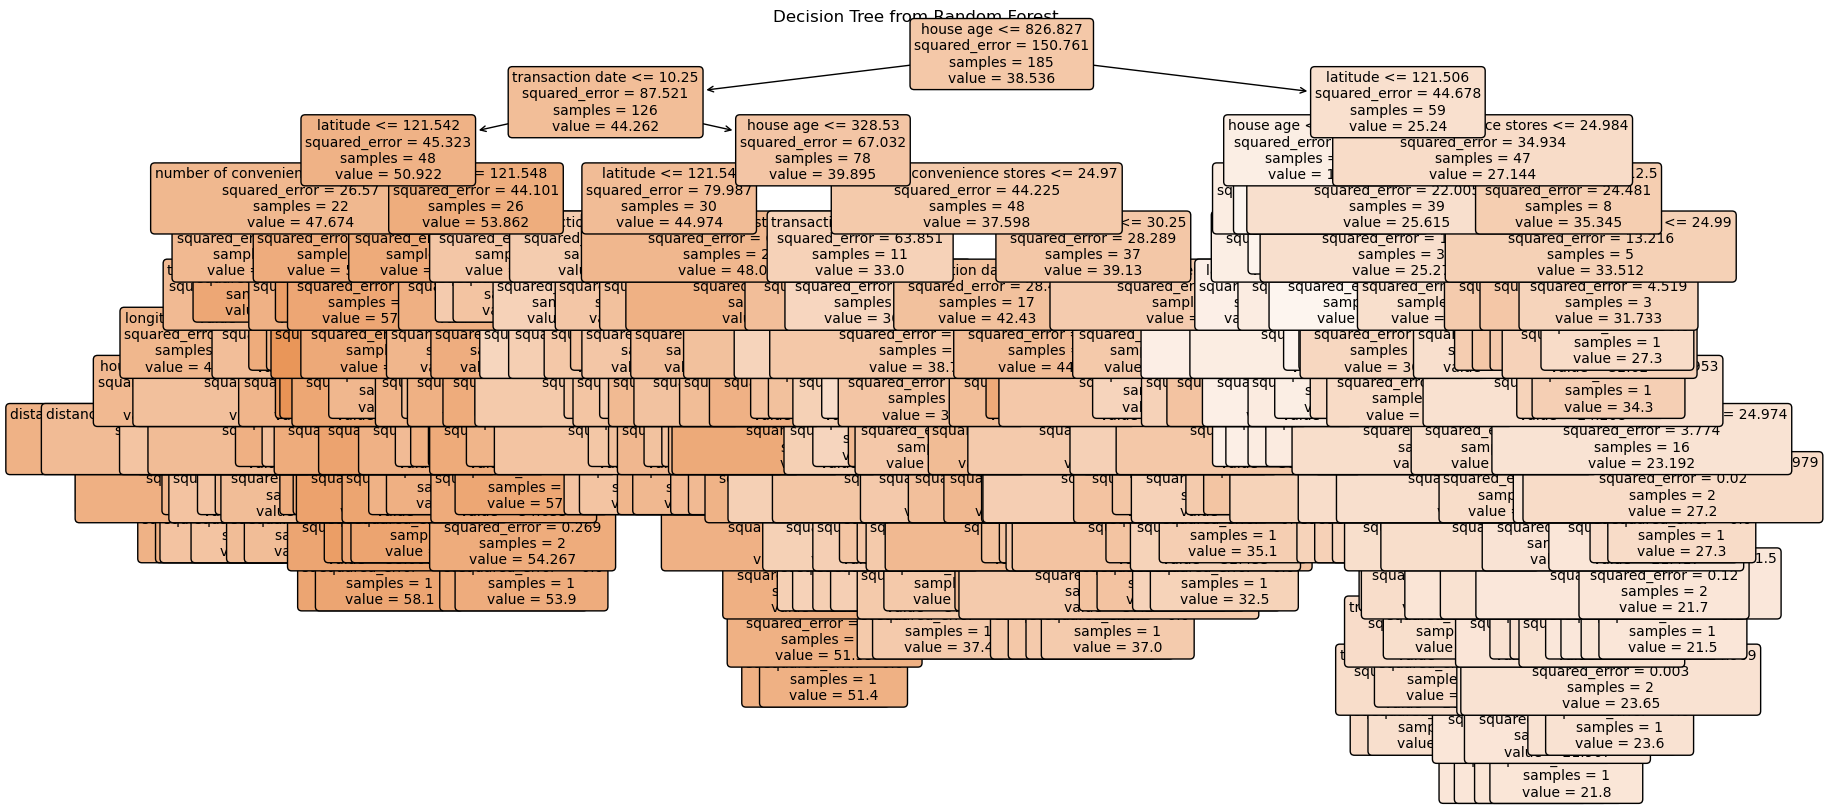

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = RF_reg.estimators_[1]


# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


### Randomized Search On Hyper Parameters.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

def RFCV(param_grid, model_name):
    
    # Random Forest Model Initialization
    model = RandomForestRegressor(random_state=0)
    
    # Hyperparameter Grid for Random Forest
    RandomForestCV = RandomizedSearchCV(model, param_grid, verbose=True)
    
    # Fit the Model with Cross-Validation
    RandomForestCV.fit(X_train, y_train)
    
    # Display the Best Hyperparameters
    print(RandomForestCV.best_params_)    
    
    # Predictions on the Test Set
    y_val_pred = RandomForestCV.predict(X_test)
    
    # Model Evaluation
    print(f"The MAE of {model_name} model on test dataset: ", metrics.mean_absolute_error(y_test, y_val_pred))
    


In [53]:

# Defining a grid of hyperparameters to search over during the hyperparameter tuning process.
# This grid includes various values for 'random_state', 'max_depth', 'n_estimators', and 'min_samples_leaf'.

param_grid = {
              'random_state':[10,50,100],
              'max_depth':[20,30,40],
              'n_estimators':[10,25,50,75,100],
              'min_samples_leaf':[3,6,9]
}

# Random Forest Cross-Validated Grid Search Function Call
RFCV(param_grid, "Random Forest")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 10, 'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 40}
The MAE of Random Forest model on test dataset:  4.604683507666167


In [54]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RF_reg = RandomForestRegressor(random_state = 50, n_estimators = 50,min_samples_leaf = 3, max_depth = 20)
RF_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = RF_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
MSE_RandomForest = np.sqrt(mse)
MAE_RandomForest_RCV= metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {MAE_RandomForest_RCV}')

Mean Squared Error: 4.589041331876008


### Result

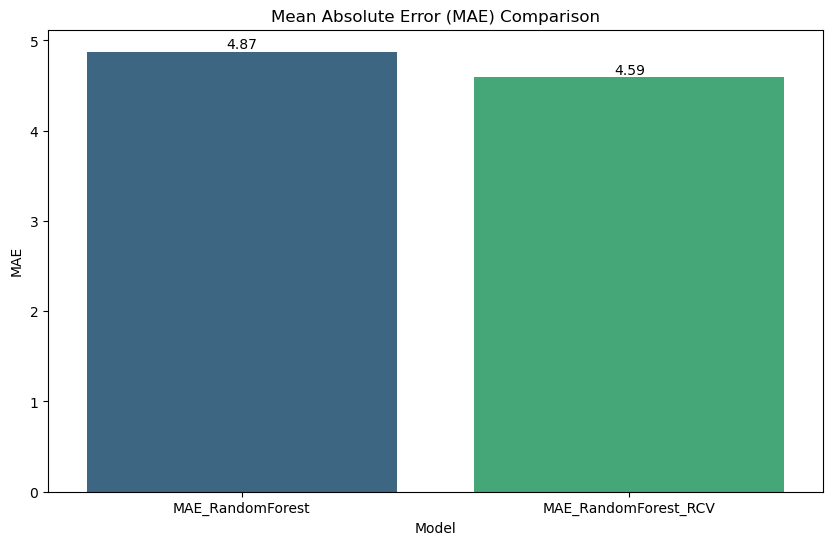

In [55]:
# Assuming you have a DataFrame with the metrics
data = {
    'Model': ['MAE_RandomForest', 'MAE_RandomForest_RCV'],
    'MAE': [MAE_RandomForest, MAE_RandomForest_RCV]
}

df = pd.DataFrame(data)

# Create a Seaborn barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y='MAE', data=df, palette='viridis')

# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

<a id = "D" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>4. DECISION TREE REGRESSOR</b></p>
</div>


In [56]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model Initialization
regressor = DecisionTreeRegressor(random_state = 0)  

# Fitting the regressor with X and Y data 
regressor.fit(X_train, y_train)

# Predictions on the Test Set
y_pred = regressor.predict(X_test)


In [57]:
# Mean Absolute Error (MAE) Calculation
MAE_DecisionTree = metrics.mean_absolute_error(y_test,y_pred)

# Mean Squared Error (MSE) Calculation
MSE_DecisionTree = metrics.mean_squared_error(y_test,y_pred)

# Root Mean Squared Error (RMSE) Calculation
RMSE_DecisionTree = np.sqrt(MSE_RandomForest)

print(f'Mean Absoulute Error: {MAE_DecisionTree}')

Mean Absoulute Error: 6.011290322580645


## Grid CV Search On Hyper Parameters.

In [58]:
from sklearn.model_selection import GridSearchCV

def GridSearchHyperParameter(param_grid, model_name):
    
    # Creating an instance of the DecisionTreeRegressor
    model = DecisionTreeRegressor(random_state=0)

    # Performing a grid search with cross-validation using GridSearchCV.
    GridCVSearch = GridSearchCV(model, param_grid, n_jobs= -1, verbose=1)
    
    # Fitting the model to the training data using the grid search.
    GridCVSearch.fit(X_train,y_train) 
    
    # Display the Best Hyperparameters
    print(GridCVSearch.best_params_)    
    
    # Predictions on the Test Set
    y_val_pred = GridCVSearch.predict(X_test)
    
    # Model Evaluation
    print(f"The MAE of {model_name} model on test dataset: ", metrics.mean_absolute_error(y_test, y_val_pred))
    
    


In [59]:
# Hyperparameter Grid for Grid Search
# Defining a grid of hyperparameters to search over during the grid search process for Decision Tree.
# The grid includes values for 'max_depth' and 'min_samples_leaf', which are crucial parameters for controlling the tree's structure.


param_of_grid_search = {'max_depth': [1, 5, 8, 10, 12, 14, 15, 18],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 50, 100]
                       }


GridSearchHyperParameter(param_of_grid_search,  "decision tree")

Fitting 5 folds for each of 56 candidates, totalling 280 fits
{'max_depth': 5, 'min_samples_leaf': 5}
The MAE of decision tree model on test dataset:  5.099678183629555


## Decision Tree With Searched Parameter

In [60]:
# Decision Tree Model Initialization
regressor = DecisionTreeRegressor(min_samples_leaf=5,max_depth=5,random_state = 0)  

# Fit the regressor with X_train and Y_train
regressor.fit(X_train, y_train)

# Predictions on the Test Set
y_pred = regressor.predict(X_test)



In [61]:
# Mean Absolute Error (MAE) Calculation
MAE_DecisionTree_GCV= mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE) Calculation
MSE_DecisionTree = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE) Calculation
RMSE_DecisionTree = np.sqrt(MSE_DecisionTree)

print(f'Mean Absoulute Error: {MAE_DecisionTree_GCV}')

Mean Absoulute Error: 5.099678183629555


## Comparing Result With Different Hyperparameters

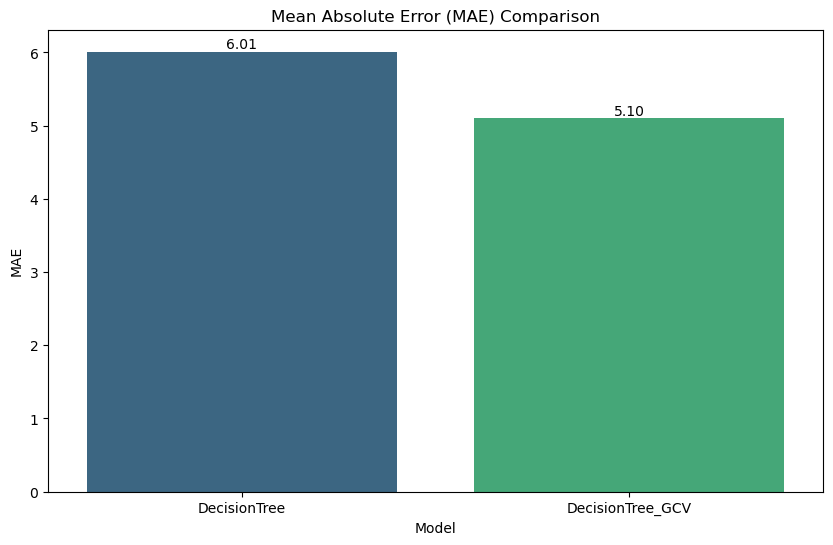

In [62]:
# Creating dataframe with the metrics
data = {
    'Model': ['DecisionTree', 'DecisionTree_GCV'],
    'MAE': [MAE_DecisionTree, MAE_DecisionTree_GCV]
}


df = pd.DataFrame(data)

# Create a Seaborn barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y='MAE', data=df, palette='viridis')
# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

<a id = "E" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>5. SUPPORT VECTOR REGRESSION</b></p>
</div>


In [63]:
# Support Vector Regressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Support Vector Regressor (SVR) Initialization
svr = SVR(C=10, gamma = 0.1)

# Fitting the SVR model to the training data.
svr.fit(X_train, y_train)

# Predictions on the Test Set
y_pred = svr.predict(X_test)

SVR_MAE= mean_absolute_error(y_test, y_pred)
print(f'Mean Absoulute Error: {SVR_MAE}')

Mean Absoulute Error: 5.476527814404257


In [64]:
svr = SVR()

# Define the parameter grid to search
# The hyperparameters 'C' and 'gamma' control the regularization and kernel width, respectively.
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svr.predict(X_test)

# Evaluate the model
SVR_MAE_GCV = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {SVR_MAE_GCV}')
print('Best Parameters:', best_params)

Mean Squared Error: 4.817837390830205
Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


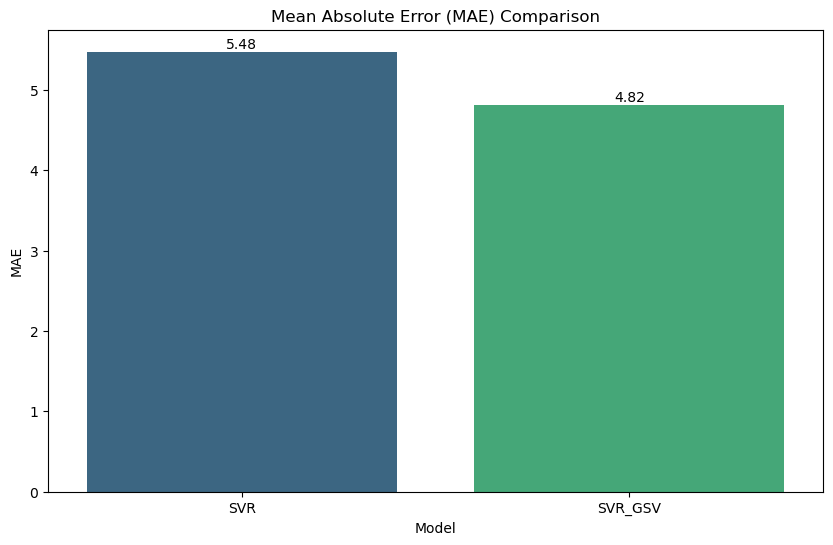

In [65]:
# Creating dataframe with the metrics
data = {
    'Model': ['SVR', 'SVR_GSV'],
    'MAE': [SVR_MAE, SVR_MAE_GCV]
}

df = pd.DataFrame(data)

# Create a Seaborn barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y='MAE', data=df, palette='viridis')

# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()



<a id = "F" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>6. KNN REGRESSOR</b></p>
</div>



In [66]:
from sklearn.neighbors import KNeighborsRegressor

# Initializing an empty list to store Mean Absolute Error (MAE) values for different neighbor values.
MAE_KNN_List = []

# Looping through different neighbor values
for neighbour in range(1,30):
    
    # Creating an instance of KNeighborsRegressor with the current number of neighbors.
    knn = KNeighborsRegressor(n_neighbors=neighbour)
    
    # Model Training and fitting the KNN model to the training data.
    knn.fit(X_train, y_train)
    
    # Predictions on the Test Set
    y_pred = knn.predict(X_test)
    
    # Calculate Mean Absolute Error (MAE)
    knn_mae = mean_absolute_error(y_test, y_pred)
    
    # Appending MAE to the list for analysis
    MAE_KNN_List.append(knn_mae)


### Visualization: Mean Absolute Error (MAE) vs. Number of Neighbors

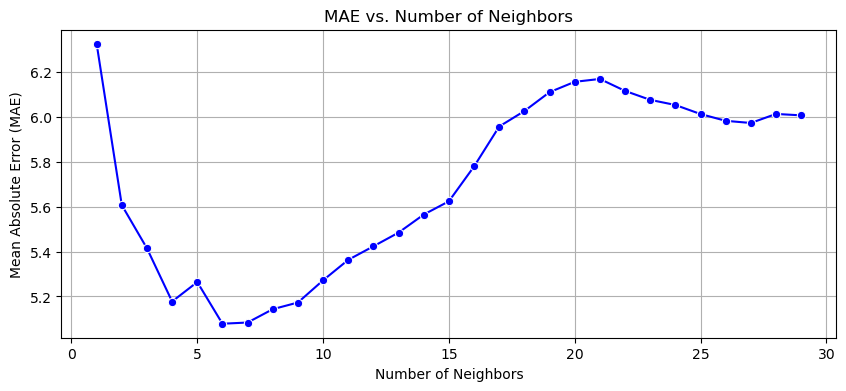

In [67]:
data = {
    'Neighbours': list(range(1, 30)),
    'MAE': MAE_KNN_List
}

df = pd.DataFrame(data)

# Create a Seaborn line plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='Neighbours', y='MAE', data=df, marker='o', color='blue')
plt.title('MAE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()


In [68]:
# Find the row with the minimum MAE
min_mae_row = df[df['MAE'] == df['MAE'].min()]

KNN_MAE = min_mae_row['MAE'].values[0]

# Display the row with the minimum MAE
print("Minimum MAE Row:")
print(min_mae_row)

Minimum MAE Row:
   Neighbours       MAE
5           6  5.078091


<a id = "G" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>7. ARTIFICIAL NEURAL NETWORK</b></p>
</div>



In [69]:
# Importing Libraries

from tensorflow.keras.models import Sequential,load_model 
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [70]:
loaded_model = load_model("Housing_ANN_Model.h5") 

In [71]:
# # Neural Network Model Initialization
# model = Sequential()
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(1))

In [72]:
# Neural Network Model Initialization
model = Sequential()

# Adding four Dense layers with ReLU activation functions.
# The choice of 20 neurons in each layer is a common starting point and can be adjusted based on the problem.

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

# Adding the output layer with a single neuron as this is a regression task.
model.add(Dense(1))

# Model Compilation and compiling the model using the Adam optimizer and Mean Squared Error (MSE) as the loss function.
model.compile(optimizer='adam',loss='mse')

### Training the Model

In [73]:
# Training the neural network model using the provided training data (X_train, y_train).

model.fit(
    x=X_train,
    y=y_train.values,
    validation_data=(X_test, y_test.values),
    batch_size=128,
    epochs=300
)


Epoch 1/300

3/3 [==============================] - 3s 227ms/step - loss: 1628.7634 - val_loss: 1563.0236
Epoch 2/300
3/3 [==============================] - 0s 39ms/step - loss: 1623.8094 - val_loss: 1558.6356
Epoch 3/300
3/3 [==============================] - 0s 39ms/step - loss: 1619.5089 - val_loss: 1554.9036
Epoch 4/300
3/3 [==============================] - 0s 37ms/step - loss: 1615.8632 - val_loss: 1551.6984
Epoch 5/300
3/3 [==============================] - 0s 38ms/step - loss: 1612.7626 - val_loss: 1549.2794
Epoch 6/300
3/3 [==============================] - 0s 37ms/step - loss: 1610.4407 - val_loss: 1547.3757
Epoch 7/300
3/3 [==============================] - 0s 36ms/step - loss: 1608.4891 - val_loss: 1545.2820
Epoch 8/300
3/3 [==============================] - 0s 39ms/step - loss: 1606.2905 - val_loss: 1542.8132
Epoch 9/300
3/3 [==============================] - 0s 40ms/step - loss: 1603.7020 - val_loss: 1539.8735
Epoch 10/300
3/3 [==============================] - 0s 40ms/st

3/3 [==============================] - 0s 37ms/step - loss: 81.1961 - val_loss: 77.4368
Epoch 79/300
3/3 [==============================] - 0s 38ms/step - loss: 80.2950 - val_loss: 76.6698
Epoch 80/300
3/3 [==============================] - 0s 44ms/step - loss: 79.3130 - val_loss: 75.5612
Epoch 81/300
3/3 [==============================] - 0s 43ms/step - loss: 78.3539 - val_loss: 74.5902
Epoch 82/300
3/3 [==============================] - 0s 42ms/step - loss: 77.4957 - val_loss: 73.7646
Epoch 83/300
3/3 [==============================] - 0s 39ms/step - loss: 76.7032 - val_loss: 73.3137
Epoch 84/300
3/3 [==============================] - 0s 40ms/step - loss: 75.8172 - val_loss: 72.9804
Epoch 85/300
3/3 [==============================] - 0s 42ms/step - loss: 75.0152 - val_loss: 72.6391
Epoch 86/300
3/3 [==============================] - 0s 37ms/step - loss: 74.4160 - val_loss: 72.4520
Epoch 87/300
3/3 [==============================] - 0s 39ms/step - loss: 73.7135 - val_loss: 71.7361
Epo

3/3 [==============================] - 0s 35ms/step - loss: 52.1026 - val_loss: 51.4035
Epoch 239/300
3/3 [==============================] - 0s 37ms/step - loss: 52.1301 - val_loss: 51.1038
Epoch 240/300
3/3 [==============================] - 0s 33ms/step - loss: 52.3949 - val_loss: 51.0991
Epoch 241/300
3/3 [==============================] - 0s 37ms/step - loss: 52.3388 - val_loss: 51.2899
Epoch 242/300
3/3 [==============================] - 0s 37ms/step - loss: 51.9621 - val_loss: 51.4892
Epoch 243/300
3/3 [==============================] - 0s 35ms/step - loss: 51.8883 - val_loss: 51.7222
Epoch 244/300
3/3 [==============================] - 0s 38ms/step - loss: 51.8918 - val_loss: 51.7328
Epoch 245/300
3/3 [==============================] - 0s 32ms/step - loss: 51.8053 - val_loss: 51.5985
Epoch 246/300
3/3 [==============================] - 0s 35ms/step - loss: 51.7544 - val_loss: 51.3896
Epoch 247/300
3/3 [==============================] - 0s 34ms/step - loss: 51.7298 - val_loss: 51

In [74]:
# The 'model.history.history' object contains information about the training and validation losses at each epoch.
losses = pd.DataFrame(model.history.history)

### Plotting Training and Validation Loss

<Axes: >

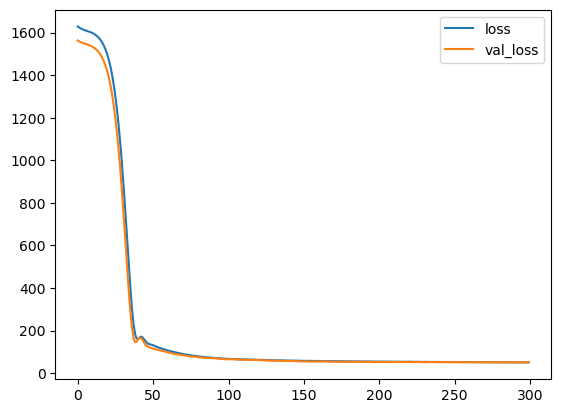

In [75]:
losses.plot()

### Evaluation on Test Data


In [76]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [77]:
# Mean Absolute Error (MAE) Calculation
MAE_ANN = mean_absolute_error(y_test, predictions)

# Mean Squared Error (MSE) Calculation
MSE_ANN = mean_squared_error(y_test, predictions)

# Root Mean Squared Error (RMSE) Calculation
RMSE_ANN = np.sqrt(MSE_ANN)

print(f'Mean Absoulute Error: {MAE_ANN}')

Mean Absoulute Error: 5.288379026228381


### Saving the model

In [78]:
model.save("Housing_ANN_Model.h5") 

C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Result

In [79]:
pd.DataFrame([MAE_ANN, MSE_ANN, RMSE_ANN],index=['MAE', 'MSE', 'RMSE'], columns=['Results']).transpose()

MAE        MSE      RMSE
Results  5.288379  51.494624  7.175976

### Visualizing The Result

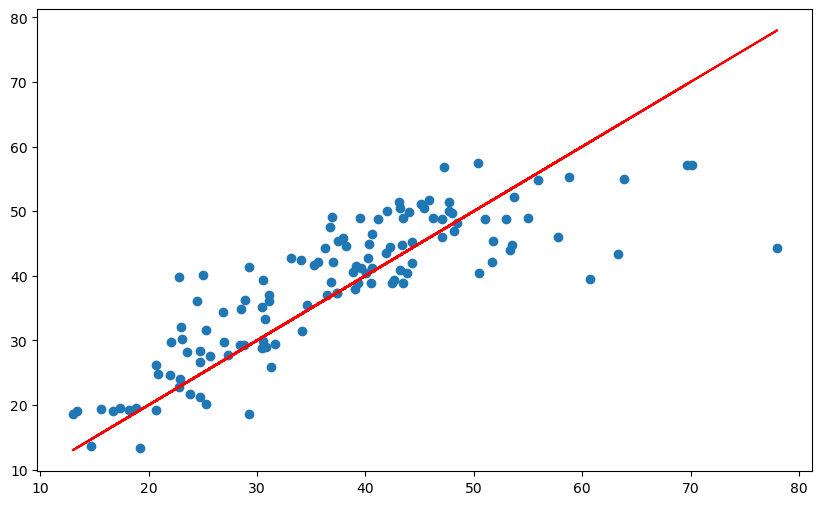

In [80]:
# Our predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

<a id = "6" ></a>
<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #31708f;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>8. CONCLUSION</b></p>
</div>



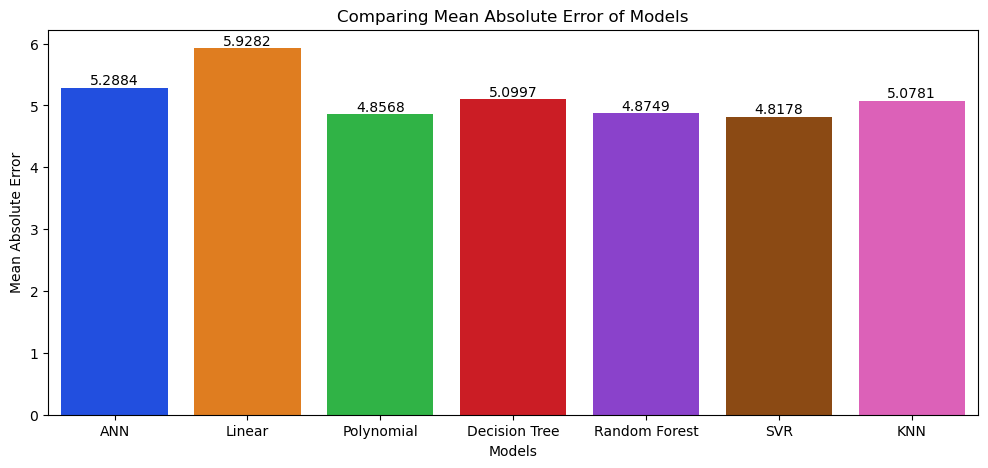

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

models = ['ANN', 'Linear', 'Polynomial','Decision Tree', 'Random Forest', 'SVR', 'KNN']
mae_values = [MAE_ANN, MAE_Linear, MAE_Poly, MAE_DecisionTree_GCV, MAE_RandomForest, SVR_MAE_GCV,KNN_MAE]

plt.figure(figsize=(12,5))
ax = sns.barplot(x = models, y = mae_values, palette = 'bright')

ax.bar_label(ax.containers[0], fmt='%.4f', label_type='edge', color='black')

plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Comparing Mean Absolute Error of Models');
plt.show()

### Result

In [82]:
results_df = pd.DataFrame([MAE_ANN, MAE_Linear, MAE_Poly, MAE_DecisionTree_GCV, MAE_RandomForest, SVR_MAE_GCV,KNN_MAE],
             index=['ANN', 'Linear', 'Polynomial','Decision Tree', 'Random Forest', 'SVR', 'KNN'], columns=['Results']).transpose()

sorted_results_df = results_df.sort_values(by='Results', axis=1)
sorted_results_df

SVR  Polynomial  Random Forest       KNN  Decision Tree  \
Results  4.817837    4.856829       4.874866  5.078091       5.099678   

              ANN    Linear  
Results  5.288379  5.928165